# Introducción a la Ciencia de los Datos, CIDE (Profesor Gonzalo Castañeda)
## P8. Limpieza de datos y su preparación
### Basado en: McKinney, Wes. 2018. “Python for Data Analysis. Data Wrangling with Pandas, NumPy, and IPython”, 2a edición, California USA: O’Reilly Media, Inc.
Cap. 7

## 1.  Manejo de datos faltantes

In [3]:
import pandas as pd
import numpy as np

In [2]:
# Cuando Pandas calcula las estadísticas descriptivas, no considera a los datos faltantes

In [3]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])     # Creamos una Serie en Pandas con un dato faltante

In [4]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [5]:
string_data.isnull()      # Forma de detectarlos sin imprimir el listado de datos

0    False
1    False
2     True
3    False
dtype: bool

In [6]:
# En Pandas tanto las cadenas 'nan' como 'None' son consdiderados como datos faltantes (además del espacio en blanco) 

In [7]:
string_data[0] = None            # Asignamos la cadena 'None' a una posición de la serie    

In [9]:
string_data.isnull()             # tanto las posiciones 0 como 2 presentan una dato faltante

0     True
1    False
2     True
3    False
dtype: bool

### Filtrado de datos faltante

In [10]:
from numpy import nan as NA              # Importamos de Numpy el 'nan'  como NA

In [11]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [12]:
data.dropna()                           # Con el método  dropna  eliminamos los datos faltantes 

0    1.0
2    3.5
4    7.0
dtype: float64

In [13]:
data = pd.Series([1, NA, 3.5, NA, 7])   
data.notnull()                           # El inverso de isnull()                    

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [14]:
data[data.notnull()]                  # Considera solo los datos que tengan una asignación True (i.e. que no sean nulos)

0    1.0
2    3.5
4    7.0
dtype: float64

In [15]:
# Con DataFrame es posible quitar columnas o renglones que tengan algún valor NA o todos su valores

In [16]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])     # Creamos un arreglo tabular
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [17]:
cleaned = data.dropna()
cleaned                        # Con un NA basta para quitar todo el renglón  con dropna()

,0,1,2
0,1.0,6.5,3.0


In [18]:
data.dropna(how='all')        # Elimina solo los renglones que tiene puros NA

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [19]:
data[4] = NA                  # Agregamos una columna adicional en la Tabla
data


,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [20]:
data.dropna(axis=1, how='all')      # Eliminamos todas las columnas (axis = 1)  que tengan puros NA

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [21]:
#  Otra forma de filtrar en DataFrame

In [22]:
df = pd.DataFrame(np.random.randn(7, 3))   # Creamos un nuevo arreglo tabular (7 x 3) con números generados con normal estandar

In [23]:
df.iloc[:4, 1] = NA                        # Asignamos algunos NA en posiciones especificas del arreglo, en columna  1 y 2
df.iloc[:2, 2] = NA
df

,0,1,2
0,-0.482674,NaN,NaN
1,-0.749145,NaN,NaN
2,-1.620731,NaN,-0.580002
3,-0.084876,NaN,-0.602954
4,-0.755219,-0.462284,-1.853011
5,-0.167879,-0.883653,-0.193558
6,-0.281317,0.347623,-2.189065


In [24]:
df.dropna()                              # Eliminamos todos los renglones con al menos un NA

,0,1,2
4,-0.755219,-0.462284,-1.853011
5,-0.167879,-0.883653,-0.193558
6,-0.281317,0.347623,-2.189065


In [25]:
df.dropna(thresh=2)                    # Eliminamos todos los renglones que tienen al menos 2 NA

,0,1,2
2,-1.620731,NaN,-0.580002
3,-0.084876,NaN,-0.602954
4,-0.755219,-0.462284,-1.853011
5,-0.167879,-0.883653,-0.193558
6,-0.281317,0.347623,-2.189065


### Rellenar en los datos faltantes

In [26]:
df.fillna(0)              # En vez de eliminar los renglones correspondientes, podría convenir cambiar los valore de NA
                          # en este caso se sustituye por un 0

,0,1,2
0,-0.482674,0.000000,0.000000
1,-0.749145,0.000000,0.000000
2,-1.620731,0.000000,-0.580002
3,-0.084876,0.000000,-0.602954
4,-0.755219,-0.462284,-1.853011
5,-0.167879,-0.883653,-0.193558
6,-0.281317,0.347623,-2.189065


In [27]:
df.fillna({1: 0.5, 2: 0})  # Con diccionarios se puede hacer algo más sofisticado dependiendo de la columna en donde este el NA

,0,1,2
0,-0.482674,0.500000,0.000000
1,-0.749145,0.500000,0.000000
2,-1.620731,0.500000,-0.580002
3,-0.084876,0.500000,-0.602954
4,-0.755219,-0.462284,-1.853011
5,-0.167879,-0.883653,-0.193558
6,-0.281317,0.347623,-2.189065


In [28]:
df.fillna(0, inplace=True)       # Si queremos que el cambio se haga de manera permanente sin crear un nuevo objeto
df                               # se usa el comando  inplace

,0,1,2
0,-0.482674,0.000000,0.000000
1,-0.749145,0.000000,0.000000
2,-1.620731,0.000000,-0.580002
3,-0.084876,0.000000,-0.602954
4,-0.755219,-0.462284,-1.853011
5,-0.167879,-0.883653,-0.193558
6,-0.281317,0.347623,-2.189065


In [29]:
# Una alternativa podría ser interpolar datos tomando en cuenta el valor más cercano disponible

In [30]:
df = pd.DataFrame(np.random.randn(6, 3))           # Creamos un nuevo arreglo tabular  
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,-0.334259,0.058627,1.193557
1,-0.979587,-1.056996,0.031313
2,-0.572313,NaN,0.139625
3,0.626968,NaN,-0.475128
4,-0.666499,NaN,NaN
5,-0.008594,NaN,NaN


In [31]:
df.fillna(method='ffill')                 # En columans 1 y 2 se hace una intrapolación

,0,1,2
0,-0.334259,0.058627,1.193557
1,-0.979587,-1.056996,0.031313
2,-0.572313,-1.056996,0.139625
3,0.626968,-1.056996,-0.475128
4,-0.666499,-1.056996,-0.475128
5,-0.008594,-1.056996,-0.475128


In [32]:
df.fillna(method='ffill', limit=2)           # Lo podríamos acotar a un cierto número de renglones

,0,1,2
0,-0.334259,0.058627,1.193557
1,-0.979587,-1.056996,0.031313
2,-0.572313,-1.056996,0.139625
3,0.626968,-1.056996,-0.475128
4,-0.666499,NaN,-0.475128
5,-0.008594,NaN,-0.475128


In [33]:
data = pd.Series([1., NA, 3.5, NA, 7])     # Con fillna podría realizar distintos tipos de operaciones

In [34]:
data.fillna(data.mean())                   # Por ejemplo, asignar los valores medios

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

### Funciones que se pueden aplicar como argumentos de fillna  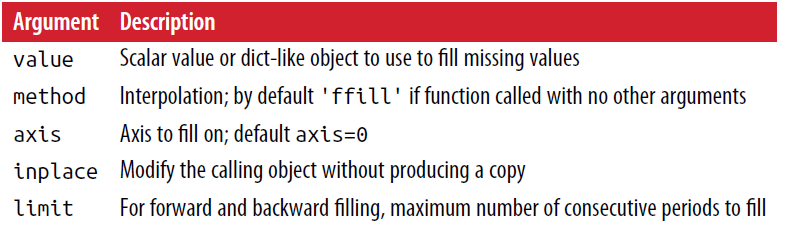

## 2. Transformación de datos

### Remover valores duplicados

In [35]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'], 'k2': [1, 1, 2, 3, 3, 4, 4]})
data                           # Creamos un nuevo arreglo con valores duplicados

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [36]:
data.duplicated()       # detecta cuando un reglón es un duplicado del renglón previos

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [37]:
data.drop_duplicates()     # Elimina el renglón duplicado

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [38]:
data['v1'] = range(7)                  # Creamos una nueva columna en la tabla

In [39]:
data.drop_duplicates(['k1'])           # Podemos eliminar los duplicados a partir de información en una columna especifica

,k1,k2,v1
0,one,1,0
1,two,1,1


In [40]:
data.drop_duplicates(['k1', 'k2'], keep='last')   # Con drop_duplicate se mantiene la primera información duplicada por default
                                       # pero podemos indicar que se mantenga el último renglón  (notar: V1 = 5 se eliminó)

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Transfromar datos usando una función o mapeo

In [41]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
'Pastrami', 'corned beef', 'Bacon',
'pastrami', 'honey ham', 'nova lox'],
'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})               # Creamos un Nuevo DataFrame con dos columnas
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [42]:
meat_to_animal = {                         # En un diccionario establecemos de qué animal viene la comida ('key')
'bacon': 'pig',                            # Todos los alimentos inician con minúscula
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}                           

In [43]:
# Notar que en datos originales, en algunos casos el alimento se inicia con letra mayúscula, por lo que queremos homogenizar

In [44]:
lowercased = data['food'].str.lower()     # Transformamos las cadenas de la variable food a minúscula
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [45]:
data['animal'] = lowercased.map(meat_to_animal)  # Vinculamos las ´keys´ de la nueva variable 'meat_to_animal' con la variable 
data                                             # de foods en mínuscula y creamos con el resultado la nueva vriable 'animal'
                                                 # en el objeto de Dataframe referido como  'data'

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [46]:
# Esta operación se puede hacer de manera más sintética a través de una función lambda

In [47]:
data['animal2'] = data['food'].map(lambda x: meat_to_animal[x.lower()])
data

,food,ounces,animal,animal2
0,bacon,4.0,pig,pig
1,pulled pork,3.0,pig,pig
2,bacon,12.0,pig,pig
3,Pastrami,6.0,cow,cow
4,corned beef,7.5,cow,cow
5,Bacon,8.0,pig,pig
6,pastrami,3.0,cow,cow
7,honey ham,5.0,pig,pig
8,nova lox,6.0,salmon,salmon


### Reemplazar valores

In [48]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])     # Creamos una nueva serie
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [49]:
data.replace(-999, np.nan)             # Si queremos considerar a -999  como un NA

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [50]:
data.replace([-999, -1000], np.nan)        # Si queremos reemplazar varios valores

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [51]:
data.replace([-999, -1000], [np.nan, 0])    # Si queremos reemplazar con distintos valores

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [52]:
data.replace({-999: np.nan, -1000: 0})      # Podemos también hacer uso de diccionarios

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Renombrar las etiquetas de los ejes

In [4]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),     # Creamos una nueva tabla 3 x 4 con etiquetas para índices y columnas
....: index=['Ohio', 'Colorado', 'New York'],
....: columns=['one', 'two', 'three', 'four'])

In [5]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [54]:
transform = lambda x: x[:4].upper()       # Establecemos una función lambda para cambiar a mayúsculas los valores

In [55]:
data.index.map(transform)                 # Aplicamos esta función a las primeras cuatro letras del índice de data 

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [56]:
data.index = data.index.map(transform)   # Hacemos la asignación para que ya quede de forma definitiva
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [57]:
data.rename(index=str.lower, columns=str.upper)   # Si queremos hacer transformaciones sin modificar tabla original


,ONE,TWO,THREE,FOUR
ohio,0,1,2,3
colo,4,5,6,7
new,8,9,10,11


In [58]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [59]:
data.rename(index={'OHIO': 'INDIANA'},
....: columns={'three': 'peekaboo'})        # Podemos hacer cambios específicos con un diccionario

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [60]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)    # Si queremos que se apliquen a la tabla original usamos  'inplace'
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### Discretización y creación de bines

In [61]:
# Datos continuos se suelen discretizar mediante la creación de rangos (bines) para estudiar sus frecuencias

In [62]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]      # Tenemos un listado de edades

In [63]:
bins = [18, 25, 35, 60, 100]      # Vamos a crear cuatro rangos de bines: (18, 25], (26, 35], (36, 60],  (61, 100]

In [64]:
cats = pd.cut(ages, bins)         # Asignamos cada valor de 'age' a su 'bin' correspondiente
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [65]:
cats.categories                 # Definición de las categrías creadas

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [66]:
cats.codes                      # Arreglo que señala a que categoría fue asignado 

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [67]:
pd.value_counts(cats)           # Contabilizamos los valores de cada categoría

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [68]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)     # Si queremos que el bin utilizado presente un inicio cerrado 

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [69]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']     # Le podemos dar nombre a los bines
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [70]:
data = np.random.rand(20)            # Creamos un nuevo listado de datos con 20 valores generados con una uniforme [0, 1]
data

array([0.16216253, 0.05734845, 0.56836764, 0.65728954, 0.44123369,
       0.55893336, 0.65446913, 0.79346131, 0.26715291, 0.41083136,
       0.43629696, 0.55005313, 0.26677298, 0.09970803, 0.22391892,
       0.04126218, 0.44059658, 0.63188946, 0.71666841, 0.07563969])

In [71]:
pd.cut(data, 4, precision=2)         # Podemos crear un número específico (4) de bines de igual tamaño         
                                     # Podemos establecer los límites del bin con precisión de dos dígitos

[(0.041, 0.23], (0.041, 0.23], (0.42, 0.61], (0.61, 0.79], (0.42, 0.61], ..., (0.041, 0.23], (0.42, 0.61], (0.61, 0.79], (0.61, 0.79], (0.041, 0.23]]
Length: 20
Categories (4, interval[float64]): [(0.041, 0.23] < (0.23, 0.42] < (0.42, 0.61] < (0.61, 0.79]]

In [72]:
data = np.random.randn(1000)           # Nuevo arreglo con 1000 datos aleatorios generados con una normal

In [73]:
cats = pd.qcut(data, 4)             # Con qcut creamos cuantiles muestrales en los que cada bin tiene mismo numero de datos
cats                                # En este caso establecemos cuartiles (=4)

[(-0.684, 0.0256], (-0.684, 0.0256], (-3.3009999999999997, -0.684], (0.641, 3.102], (0.0256, 0.641], ..., (0.0256, 0.641], (-3.3009999999999997, -0.684], (-3.3009999999999997, -0.684], (-0.684, 0.0256], (-0.684, 0.0256]]
Length: 1000
Categories (4, interval[float64]): [(-3.3009999999999997, -0.684] < (-0.684, 0.0256] < (0.0256, 0.641] < (0.641, 3.102]]

In [74]:
pd.value_counts(cats)               # los bins son uniformes en tamaño

(-3.3009999999999997, -0.684]    250
(-0.684, 0.0256]                 250
(0.0256, 0.641]                  250
(0.641, 3.102]                   250
dtype: int64

### Detección y filtro de Outliers

In [75]:
data = pd.DataFrame(np.random.randn(1000, 4))               # Veamos un ejemplo con datos generados con una normal

In [76]:
data.describe()                                             # Algunas estadísticas descriptivas

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.012748,-0.023614,-0.020223,0.040109
std,1.010623,0.993172,0.976542,0.993609
min,-3.585617,-3.865823,-3.247839,-3.220009
25%,-0.689244,-0.683259,-0.726984,-0.596744
50%,-0.077955,0.009033,-0.016754,0.044544
75%,0.687178,0.647753,0.653605,0.706720
max,2.869107,3.893130,3.076400,3.154611


In [77]:
col = data[2]                      # Queremos encontrar valores de una columna (2) que exceden de un cierto valor
col[np.abs(col) > 3]               # Existen tres de estos valores

394    3.076400
415   -3.247839
768    3.017507
Name: 2, dtype: float64

In [78]:
data[(np.abs(data) > 3).any(1)]        # Si queremos identificar los renglones con los valores extremos de cualquier columna

,0,1,2,3
0,0.653352,0.661872,1.436226,3.154611
109,0.409033,0.020442,0.096001,-3.220009
227,-0.353835,3.893130,-0.201711,1.377760
334,-1.317592,3.215015,-0.665049,0.694332
394,0.581513,0.032315,3.076400,0.513542
415,-1.373903,0.082120,-3.247839,-0.079418
522,-3.585617,1.304957,-0.818945,-0.549045
719,1.943238,0.430472,-0.433970,3.100649
728,-1.725228,3.061949,0.540536,1.032364
768,0.122757,0.121776,3.017507,-1.231587


In [81]:
np.sign(data).head()       # Checar que np.sign( )  asigna -1  o 1 dependiendo de si el valor correspondiente en data en + o -  

,0,1,2,3
0,1.0,1.0,1.0,1.0
1,-1.0,-1.0,-1.0,1.0
2,1.0,1.0,-1.0,-1.0
3,-1.0,1.0,1.0,1.0
4,-1.0,-1.0,-1.0,1.0


In [82]:
data[np.abs(data) > 3] = np.sign(data) * 3      # A los valores extremos les asignamos 3 o -3 dependiendo de si son - o +

In [83]:
data.describe()                                 # Notar que ahora no hay valores extremos que excedan a tres en valor absoluto

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.012162,-0.023918,-0.020069,0.040074
std,1.008718,0.986179,0.975459,0.992131
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.689244,-0.683259,-0.726984,-0.596744
50%,-0.077955,0.009033,-0.016754,0.044544
75%,0.687178,0.647753,0.653605,0.706720
max,2.869107,3.000000,3.000000,3.000000


### Permutaciones y muestreo aleatorio

In [84]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))             # Veamos un ejemplo en tabla 5 x 4

In [85]:
sampler = np.random.permutation(5)                      # Producimos un nuevo ordenamiento de 5 número
sampler

array([0, 1, 4, 3, 2])

In [86]:
df                         # Podemos usar esa permutación para reordenar el índice                                             

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [87]:
df.take(sampler)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
4,16,17,18,19
3,12,13,14,15
2,8,9,10,11


In [88]:
df.sample(n=3)             # Podemos elegir una submuestra aleatoria de renglones ( n = 3) sin reemplazo

,0,1,2,3
1,4,5,6,7
4,16,17,18,19
0,0,1,2,3


In [89]:
choices = pd.Series([5, 7, -1, 6, 4])        # En este ejemplo vemos como se pueden elegir muestras con reemplazo

In [90]:
draws = choices.sample(n=10, replace=True)     # El default es sin reemplazo, aquí un mismo valor puede aparecer varias veces
draws

4    4
1    7
2   -1
2   -1
3    6
2   -1
4    4
4    4
4    4
0    5
dtype: int64

### Crear variables Dummies (indicadores categóricos)

In [91]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})   # Se crean una Tabla con dos variables
df                                                             # La primera variable son categorías

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [92]:
pd.get_dummies(df['key'])     # Si en la variable 'key' hay k (= 3) valores distintos se crea una matriz de K columnas
                              #  y se asigna un 1 cuando el valor de la columna aparece en el renglón correspondiente

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [93]:
dummies = pd.get_dummies(df['key'], prefix='key')    # Podemos crear una nueva tabla con las dummies, con una nueva etiqueta
dummies                               # Agregamos el prefijo al valor que aparece en 'key' para definir etiqueta de columnas

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [94]:
df_with_dummy = df[['data1']].join(dummies)   # Juntamos la otra variable (data1)  con las dummies para crear una nueva tabla
df_with_dummy                                 # De esta forma especificamos las tres categorías de key como dummies distintas

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [95]:
# Vemos como se hace con un ejemplo más soficticado

In [6]:
mnames = ['movie_id', 'title', 'genres']     # Le damos nombres a las variables (columnas)

In [7]:
movies = pd.read_table('movies.dat', sep='\::' , header=None, names=mnames)

<ipython-input-7-3fa8dad1a005>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_table('movies.dat', sep='\::' , header=None, names=mnames)


In [8]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [99]:
# Vamos agregar dummies categóricas para los géneros

In [9]:
all_genres = []                       # Primero extraeremos los generos de la base de datos
movies.genres

0        Animation|Children's|Comedy
1       Adventure|Children's|Fantasy
2                     Comedy|Romance
3                       Comedy|Drama
4                             Comedy
                    ...             
3878                          Comedy
3879                           Drama
3880                           Drama
3881                           Drama
3882                  Drama|Thriller
Name: genres, Length: 3883, dtype: object

In [10]:
for x in movies.genres:
   all_genres.extend(x.split('|'))  #Vamos incorporando los generos de cada renglos dividiendo los términos con el separador '|'

In [11]:
genres = pd.unique(all_genres)    # Quitamos valor duplicados de la lista y creamos un arreglo
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [12]:
zero_matrix = np.zeros((len(movies), len(genres))) # Vamos a construir el arreglo tabular con puros ceros, columnas es el género

In [13]:
dummies = pd.DataFrame(zero_matrix, columns=genres)   # Creamos un arreglo tabular a partir de la matriz de ceros
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
gen = movies.genres[0]                       # Checamos a la variable género  renglón por renglón. Ejemplo con primer renglón
gen

"Animation|Children's|Comedy"

In [15]:
gen.split('|')                               # Separamos los géneros asociados

['Animation', "Children's", 'Comedy']

In [107]:
dummies.columns.get_indexer(gen.split('|'))  # A cada elemento le agrega un índice

array([0, 1, 2])

In [16]:
for i, gen in enumerate(movies.genres):               # enumerator le agrega un contador (i) a cada elemento del iterador (gen)
    indices = dummies.columns.get_indexer(gen.split('|'))  # genero los índices para cada palabra
    # print(indices)                                     # checa que los indices van apareciendo conforme surgen nuevos géneros
    dummies.iloc[i, indices] = 1                       # los renglones corresponden al total de películas, y columnas a géneros

In [17]:
dummies                                              # Matriz con los indicadore que señalan que géneros hat en cada película

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))        # Al DataFrame de movies le agregamos las categoría 

In [111]:
movies_windic

,movie_id,title,genres,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,Genre_Drama,...,Genre_Crime,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,3949,Requiem for a Dream (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,3950,Tigerland (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,3951,Two Family House (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
movies_windic.iloc[0]             # Si quiero checar solo el primer renglón. Notar que aparecen las etiquetas de las variables 

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Animation                              1.0
Genre_Children's                             1.0
Genre_Comedy                                 1.0
Genre_Adventure                              0.0
Genre_Fantasy                                0.0
Genre_Romance                                0.0
Genre_Drama                                  0.0
Genre_Action                                 0.0
Genre_Crime                                  0.0
Genre_Thriller                               0.0
Genre_Horror                                 0.0
Genre_Sci-Fi                                 0.0
Genre_Documentary                            0.0
Genre_War                                    0.0
Genre_Musical                                0.0
Genre_Mystery                                0.0
Genre_Film-Noir                              0.0
Genre_Western       

In [113]:
# Otro  ejemplo

In [114]:
np.random.seed(12345)             # Establecemos semilla aleatoria

In [115]:
values = np.random.rand(10)      # Generamos un arreglo aleatorio de 10 valores
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [116]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]    # Establecemos los rangos de los bins

In [117]:
pd.get_dummies(pd.cut(values, bins))   # Creamos las dummies a partir de los bins a los que pertenece cada variable

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


## 3. Manipulación con cadena

### Métodos para cádenas

In [18]:
val = 'a,b, guido'

In [19]:
val.split(',')           # Para separar caracteres y ponerlos en una lista

['a', 'b', ' guido']

In [20]:
pieces = [x.strip() for x in val.split(',')]     # Otra alternativa
pieces

['a', 'b', 'guido']

In [21]:
first, second, third = pieces                   # Se desmpeca una lista en tres partes

In [22]:
first + '::' + second + '::' + third            # Las partes se concatenan con un delimitador

'a::b::guido'

In [23]:
'::'.join(pieces)                                # Un procedimiento más rápido

'a::b::guido'

In [24]:
'guido' in val                   # localizacióm de sub.cadenas

True

In [25]:
val.index(',')                   # localización de la posición de un caracter

1

In [26]:
val.find(':')             # Con find se puede saber si el caracter no está incluido  (asigna -1, i.e. arroja una excepción)

-1

In [27]:
val.index(':')            # Notar que esto no opera con index

ValueError: substring not found

In [28]:
val.count(',')            # Número de ocurrencias de un caracter en particular

2

In [29]:
val.replace(',', '::')   # Reemplazo de caracteres

'a::b:: guido'

In [30]:
val.replace(',', '')      # Inclusive con espacios en blanco

'ab guido'

### Métodos de cadenas     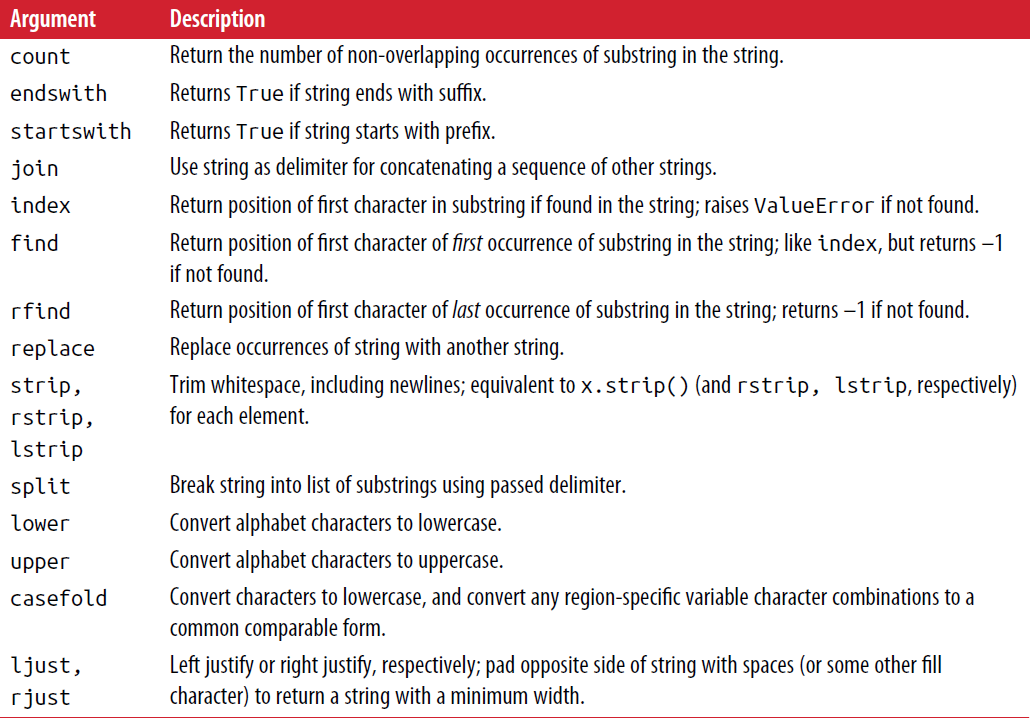 

### Funciones con cadenas vectorizadas

In [131]:
# Covenientes para detectar patrones en las cadenas

In [31]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
.....: 'Rob': 'rob@gmail.com', 'Wes': np.nan}         # Veamos algunos ejemplos

In [133]:
data = pd.Series(data)                                # Creamos una serie con el dciccionario
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [134]:
data.str.contains('gmail')                          # Queremos checar que correo es de gmail

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [135]:
data.str[:5]                                      # Queremos tomar los primeros cinco elementos

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

### Se pueden aplicar muchos otros métodos  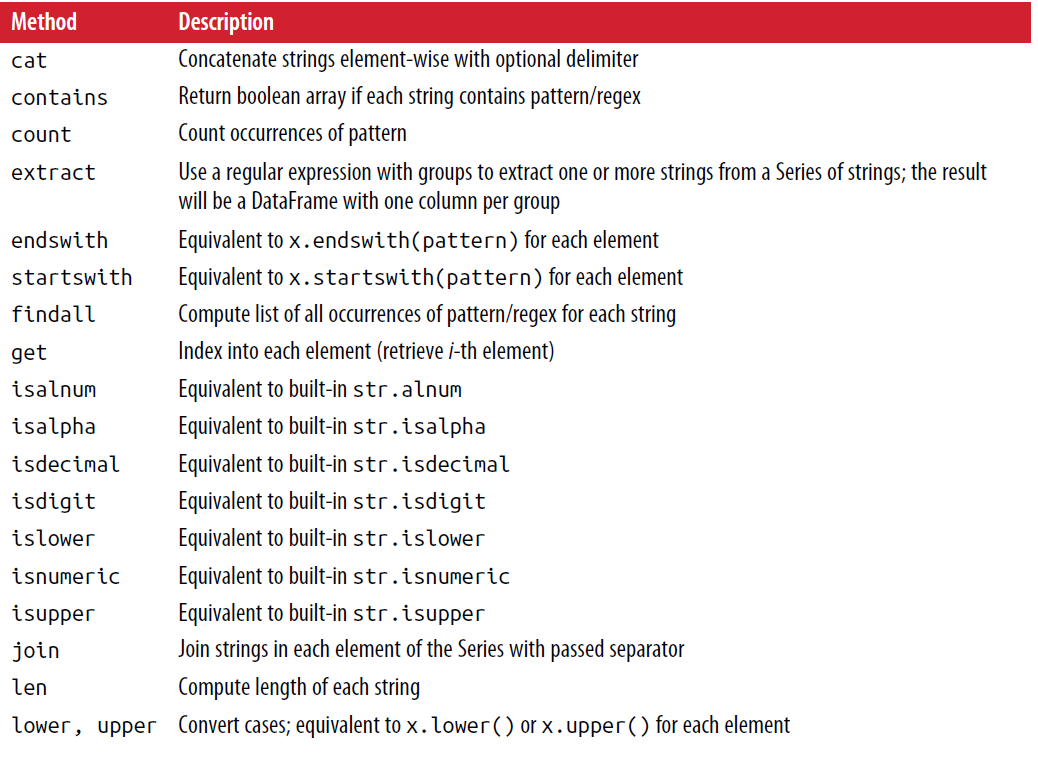  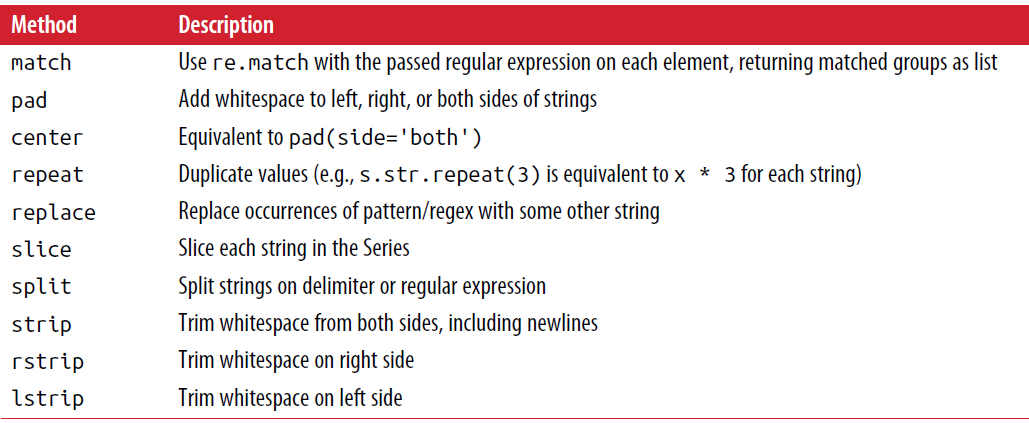